In [1]:
#Importem les llibreries necessàries
import numpy as np
import pandas as pd
import matplotlib, matplotlib.pyplot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler



In [2]:
#Llegim el fitxer csv on hi tenim els clusters corresponents a cada pacient
archivo = "C:/Users/ASUS/Documents/bioinf/kmeans_labels.csv"
cluster_labels = pd.read_csv(archivo, index_col = 0)
cluster_labels 


,x
X00f54652.691e.4446.869a.4dd51c236f56,4
X017f7806.7804.43b9.8123.e1b48d2d6496,3
X02baceff.cbab.41cb.b801.be18ad6991b2,4
X036f7712.a636.4198.b568.6c85d9db4a3b,1
X0386037f.728c.47b0.93d0.6bb81b8b2a05,2
...,...
fdc7d01c.8737.4959.a13f.a6f85f037e65,3
feabad6d.2c34.4491.bfd3.afd36b1435fc,1
fecd3669.e812.49ce.8914.9d84ded36f35,2
ff101b50.3317.4296.a0bf.2316cb4b039a,3


In [3]:
# Llegim el fitxer csv on hi tenim pacients i gens
archiu = "C:/Users/ASUS/Documents/bioinf/wdf.csv"
wdf = pd.read_csv(archiu, index_col=0)
wdf

,00f54652-691e-4446-869a-4dd51c236f56,017f7806-7804-43b9-8123-e1b48d2d6496,02baceff-cbab-41cb-b801-be18ad6991b2,036f7712-a636-4198-b568-6c85d9db4a3b,0386037f-728c-47b0-93d0-6bb81b8b2a05,04bbfd91-0b04-4659-a32b-ee3afbc1f30e,04c7e26b-8546-47ca-b612-c05d7923cffc,05c2e90c-544c-425c-8bc2-961653ee1e7b,05e8a50c-4478-4d28-977b-68cc319493a9,06735819-fc94-4e07-b528-8bea573f5ace,...,fbc34a61-f35f-491b-a610-755582447f66,fc853d38-8069-41b0-af9c-77925a3f8063,fcc7bbfe-602a-4780-80fa-924fa8a18ecb,fd2f3554-eb54-4ce2-a588-a17438c4ba18,fdc1657e-e27f-4c79-97a0-6b6392aed9f4,fdc7d01c-8737-4959-a13f-a6f85f037e65,feabad6d-2c34-4491-bfd3-afd36b1435fc,fecd3669-e812-49ce-8914-9d84ded36f35,ff101b50-3317-4296-a0bf-2316cb4b039a,ffe2a9f5-b8ca-490f-b9b0-656738c3b586
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000211592.8,12.452363,11.475355,13.809233,15.278539,9.053309,5.315715,7.086541,6.147909,15.278539,14.112977,...,5.203891,15.278539,7.897460,10.107107,7.479887,9.538441,12.899550,8.221908,12.005598,12.207016
ENSG00000211896.7,11.584779,7.176898,12.005598,13.225937,7.340080,4.210884,3.935485,4.072637,13.948601,11.770833,...,3.423572,14.112977,6.424243,7.847400,5.028297,7.042324,11.703987,3.913244,10.626798,10.107107
ENSG00000239951.1,9.256775,7.433069,8.666235,9.972952,5.225552,3.397955,3.306240,2.769816,11.073748,9.938300,...,2.902968,11.297022,4.574358,4.873654,3.195021,5.182210,9.538441,5.290928,7.244777,7.386283
ENSG00000253755.1,7.502980,6.424243,7.623398,8.611407,5.290928,3.218022,2.280222,2.280222,11.337825,6.257272,...,1.918856,10.432136,4.394419,2.970638,3.037665,4.305823,8.910054,1.460409,7.897460,7.340080
ENSG00000211895.5,8.719594,10.594411,10.107107,10.881554,8.827717,4.940462,6.213904,3.889713,11.923654,9.346434,...,4.233082,11.703987,5.798305,7.479887,5.182210,8.693164,10.784256,7.623398,10.041264,10.004961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000233913.7,7.772924,1.855600,3.589267,1.692894,4.485730,6.600930,8.299735,7.479887,1.503855,1.307686,...,7.042324,0.492983,4.595265,1.710991,3.913244,3.195021,2.514830,6.319995,8.221908,4.960927
ENSG00000134184.13,3.681631,0.013576,4.711844,0.034561,0.228219,1.398196,4.485730,3.564781,1.918856,1.129623,...,4.439643,0.000863,6.709701,0.057135,0.324894,0.156480,0.057135,0.711861,1.569350,0.132877
ENSG00000196735.13,3.796913,5.994376,5.159739,4.551661,3.283745,4.666333,4.850172,4.350666,5.382314,2.835846,...,5.225552,4.895895,6.016282,4.732867,5.382314,5.579038,4.257163,5.972147,4.329187,5.994376


In [39]:
# Initialize the StandardScaler
scaler = StandardScaler()

#Scale the data
scaler = StandardScaler().fit(wdf)
scaled_data = scaler.transform(wdf)


# Convert the scaled data back to a DataFrame (if needed)
wdf_scaled = pd.DataFrame(scaled_data, columns=wdf.columns, index=wdf.index)
# Now wdf_scaled contains the scaled data

wdf_scaled.to_csv('/Users/ASUS/Documents/bioinf/scaled_data.csv')

In [37]:
print(wdf_scaled.mean(axis = 0))
print(wdf_scaled.std(axis = 0))

00f54652-691e-4446-869a-4dd51c236f56    1.172396e-16
017f7806-7804-43b9-8123-e1b48d2d6496    1.136868e-16
02baceff-cbab-41cb-b801-be18ad6991b2    1.172396e-16
036f7712-a636-4198-b568-6c85d9db4a3b    3.694822e-16
0386037f-728c-47b0-93d0-6bb81b8b2a05    8.526513e-17
                                            ...     
fdc7d01c-8737-4959-a13f-a6f85f037e65    1.421085e-16
feabad6d-2c34-4491-bfd3-afd36b1435fc   -1.278977e-16
fecd3669-e812-49ce-8914-9d84ded36f35   -1.136868e-16
ff101b50-3317-4296-a0bf-2316cb4b039a    1.278977e-16
ffe2a9f5-b8ca-490f-b9b0-656738c3b586    1.136868e-16
Length: 520, dtype: float64
00f54652-691e-4446-869a-4dd51c236f56    1.001002
017f7806-7804-43b9-8123-e1b48d2d6496    1.001002
02baceff-cbab-41cb-b801-be18ad6991b2    1.001002
036f7712-a636-4198-b568-6c85d9db4a3b    1.001002
0386037f-728c-47b0-93d0-6bb81b8b2a05    1.001002
                                          ...   
fdc7d01c-8737-4959-a13f-a6f85f037e65    1.001002
feabad6d-2c34-4491-bfd3-afd36b1435fc    1.0010

In [38]:
#Fem la transposada del dataframe wdf 
wdf_transposed = wdf_scaled.transpose()

wdf_transposed

gene_id,ENSG00000211592.8,ENSG00000211896.7,ENSG00000239951.1,ENSG00000253755.1,ENSG00000211895.5,ENSG00000211677.2,ENSG00000129824.16,ENSG00000168878.19,ENSG00000211666.2,ENSG00000241351.3,...,ENSG00000168497.5,ENSG00000167996.16,ENSG00000169439.12,ENSG00000185133.14,ENSG00000163399.16,ENSG00000233913.7,ENSG00000134184.13,ENSG00000196735.13,ENSG00000175567.11,ENSG00000130522.6
00f54652-691e-4446-869a-4dd51c236f56,1.879509,1.636076,0.982868,0.490776,0.832142,0.950143,-1.602705,-1.266412,0.545947,0.538975,...,-0.160402,0.006836,0.580534,0.692498,-0.458932,0.566519,-0.581446,-0.549099,0.909416,1.202986
017f7806-7804-43b9-8123-e1b48d2d6496,1.605372,0.399281,0.471159,0.188096,1.358191,0.941572,-1.610654,0.438553,0.274240,0.135257,...,-0.122943,1.257601,0.614663,0.478037,0.412101,-1.093806,-1.610654,0.067481,0.608374,0.839391
02baceff-cbab-41cb-b801-be18ad6991b2,2.260228,1.754151,0.817170,0.524563,1.221459,0.870114,0.750033,0.006836,0.471159,0.643375,...,0.349390,-0.080059,1.257601,0.650476,0.801786,-0.607362,-0.292381,-0.166707,0.219062,0.832142
036f7712-a636-4198-b568-6c85d9db4a3b,2.672496,2.096563,1.183817,0.801786,1.438759,1.088982,-1.551393,1.578915,1.107753,0.974329,...,-1.030912,0.614663,0.256264,-0.362265,0.194103,-1.139459,-1.604766,-0.337326,0.594711,0.425087
0386037f-728c-47b0-93d0-6bb81b8b2a05,0.925818,0.445088,-0.148248,-0.129903,0.862518,0.256275,-1.455496,-1.328985,-0.330972,-0.449209,...,0.524586,0.329438,0.801821,0.966149,0.531478,-0.355841,-1.550496,-0.693117,1.098697,0.763593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fdc7d01c-8737-4959-a13f-a6f85f037e65,1.061917,0.361527,-0.160405,-0.406312,0.824739,0.024463,-1.570583,1.384865,-0.439425,-0.562416,...,-0.030633,0.524572,0.580544,0.559092,-0.017927,-0.717994,-1.570583,-0.049058,1.008042,0.934012
feabad6d-2c34-4491-bfd3-afd36b1435fc,2.004983,1.669523,1.061899,0.885582,1.411459,1.144933,-1.551393,0.650476,0.778470,0.728446,...,-0.555649,0.471159,0.445068,0.262468,-0.012306,-0.908834,-1.598432,-0.419959,0.933996,0.801786
fecd3669-e812-49ce-8914-9d84ded36f35,0.692567,-0.516510,-0.129911,-1.204813,0.524616,0.098475,-1.105374,0.657480,-0.154335,-0.349849,...,0.305065,-0.068159,0.580593,0.298764,0.399322,0.158861,-1.414867,0.061250,1.017542,0.707776
ff101b50-3317-4296-a0bf-2316cb4b039a,1.754153,1.367279,0.418327,0.601462,1.202986,1.061900,-1.524717,0.801786,0.176692,-0.148241,...,-0.368757,0.629230,0.511518,0.373928,-0.686776,0.692498,-1.174125,-0.399750,0.982868,0.999626


In [26]:
# passem els dos dataframes a array
X = wdf_transposed.to_numpy()
y = cluster_labels.to_numpy()
X

array([[ 1.87950916,  1.63607617,  0.98286821, ..., -0.54909909,
         0.90941581,  1.20298567],
       [ 1.60537224,  0.39928123,  0.47115926, ...,  0.06748077,
         0.6083736 ,  0.83939113],
       [ 2.26022784,  1.75415135,  0.81716951, ..., -0.16670733,
         0.21906228,  0.83214155],
       ...,
       [ 0.69256732, -0.51650998, -0.12991057, ...,  0.06124992,
         1.01754244,  0.70777644],
       [ 1.75415266,  1.36727916,  0.41832737, ..., -0.39974993,
         0.98286821,  0.99962619],
       [ 1.81068701,  1.22147321,  0.45803684, ...,  0.06748153,
         0.75649573,  0.92578801]])

In [27]:

#Dividim les dades en conjunts d'entrenament i prova, tenint una mostra de test del 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
#Creació i entrenament del model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#Evaluació del model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Exactitud del modelo: {accuracy}')
print(f'Reporte de clasificación:\n{report}')

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Exactitud del modelo: 0.9519230769230769
Reporte de clasificación:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       0.93      0.96      0.94        26
           3       0.90      0.95      0.92        19
           4       1.00      1.00      1.00        15
           5       0.96      0.88      0.92        26

    accuracy                           0.95       104
   macro avg       0.96      0.96      0.96       104
weighted avg       0.95      0.95      0.95       104



In [24]:
y_list = y.tolist()

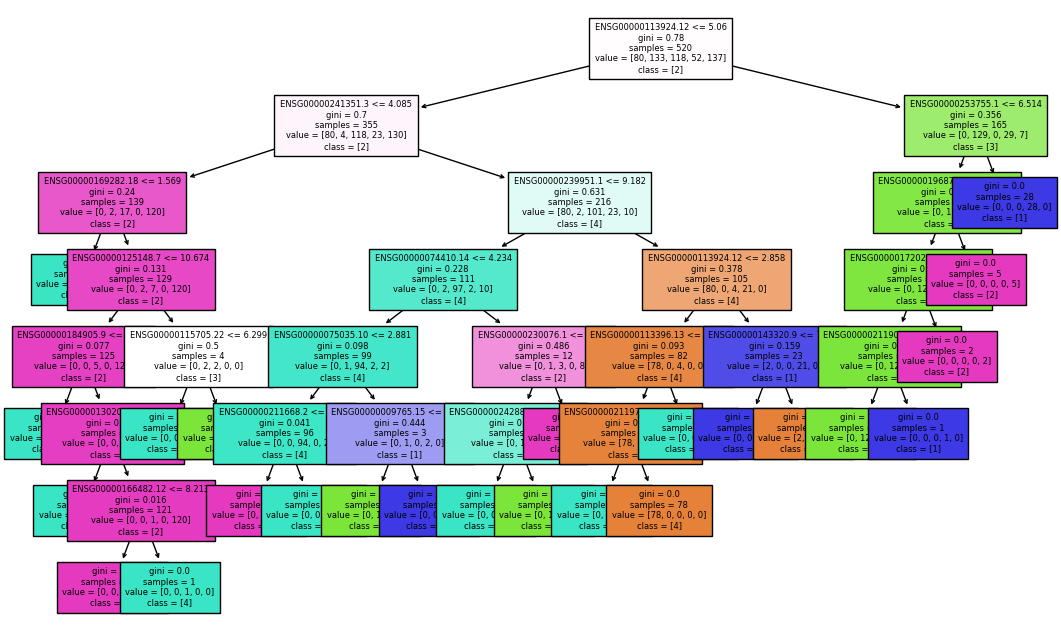

<Figure size 640x480 with 0 Axes>

In [28]:
# Classification Tree

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load example dataset (Iris dataset)
#iris = load_iris()
X = wdf.to_numpy()
X_t=X.T

gene_names=wdf.index.tolist() #this is the y

# Initialize DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Fit the classifier on the data
clf.fit(X_t, y)

# Plot the tree
plt.figure(figsize=(13, 8))
plot_tree(clf, filled=True, feature_names=gene_names, class_names=[str(label) for label in y_list], fontsize=6)
plt.show()
plt.savefig(f"/Users/ASUS/Documents/bioinf/tree.svg")


In [ ]:
# ROC CURVE FOR EACH CLUSTER 

# Obtener datos
X = wdf.to_numpy()
X_transposed = X.T

archivo_csv = "C:/Users/ASUS/Documents/bioinf/kmeans_labels.csv"

cluster_lab_df = pd.read_csv(archivo_csv)
cluster_labels = cluster_lab_df.iloc[:, 1].values
cluster_lab_df.columns = ['patient', 'cluster']

In [ ]:
y = cluster_labels

In [ ]:
# Split de datos
X_train, X_test, y_train, y_test = train_test_split(X_transposed, y, test_size=0.2, random_state=42)


In [ ]:
# Modelo
classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)


In [ ]:
# Binarizar etiquetas
y_bin = label_binarize(y_test, classes=list(set(y)))


In [ ]:
# Inicializar gráfico
plt.figure(figsize=(8, 6))

# Calcular la curva ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
interp_tpr = dict()  # Diccionario para almacenar valores interpolados

for i in range(len(set(y))):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Interpolar para obtener una curva más suave
    interp_tpr[i] = np.interp(np.linspace(0, 1, 100), fpr[i], tpr[i])

# Calcular el micro promedio de ROC-AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Interpolar para el micro-average
interp_tpr["micro"] = np.interp(np.linspace(0, 1, 100), fpr["micro"], tpr["micro"])

# Dibujar la curva ROC para cada clase
for i in range(len(set(y))):
    plt.plot(np.linspace(0, 1, 100), interp_tpr[i], label=f'Cluster {i} (AUC = {roc_auc[i]:.2f})')

# Dibujar la curva ROC micro promedio
plt.plot(np.linspace(0, 1, 100), interp_tpr["micro"],
         label=f'Micro-average (AUC = {roc_auc["micro"]:.2f})',
         color='deeppink', linestyle='--')

# Configuración del gráfico
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('Tasa de falso positivo (FPR)')
plt.ylabel('Tasa de verdadero positivo (TPR)')
plt.title('Curva ROC para cada cluster')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# FEATURE IMPORTANCE

# Obtener importancia de las características
importances = model.feature_importances_

# Obtener los índices de las características más importantes
top_gene_indices = importances.argsort()[::-1][:10]

# Obtener los nombres de los genes correspondientes del índice del DataFrame
top_genes = wdf.index[top_gene_indices]

print("Top 10 genes:")
print(top_genes)


In [ ]:

#Visualitzem el model en gràfica
feature_importances = model.feature_importances_
#Creem un bar chart per tal de visualitzar amb feature importances
matplotlib.pyplot.figure(figsize=(8, 6))
matplotlib.pyplot.bar(range(len(feature_importances)), feature_importances)
matplotlib.pyplot.xlabel('Feature Index')
matplotlib.pyplot.ylabel('Feature Importance')
matplotlib.pyplot.title('Random Forest Feature Importances')